# 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기
- 적은 샘플 : 수백~수만 개 사이의 샘플
- 2000개의 개, 2000개의 고양이 사진 사용
    - 훈련용 2000개, 검증, 테스트에 1000개씩 사용

## 5.2.1 작은 데이터셋 문제에서 딥러닝의 타당성
- 특성 공학의 수작없 없이 특성을 찾기 때문에 많은 훈련 데이터가 필요함
- 모델이 작고 규제가 잘 되어 있으면 수백 개의 샘플로도 충분할 수 있음
- 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트(speech-to-text) 모델을 조금만 변경하면 완전히 다른 문제에 재사용할 수 있음

## 5.2.2 데이터 내려받기
- 컨브넷이 주류가 되기 전 캐글에서 컴퓨터 비전 경연 대회 일환으로 만들어진 데이터셋
- [jpg 파일](https://www.kaggle.com/c/dogs-vs-cats/data)

### 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [1]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '../datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '../datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## 5.2.3 네트워크 구성하기
- MNIST 숫자 분류보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 제작
- `Conv2D` 레이어를 추가하여 네트워크의 용량을 늘리고 `Flatten` 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄임
- 특성 맵의 깊이는 네트워크에서 점진적으로 증가(32에서 128까지), 특성 맵의 크기는 감소(150x150에서 7x7)
    - 대부분의 컨브넷에서 볼 수 있는 전형적인 패턴
- 이진 분류이므로 출력 층의 유닛은 1, 활성화 함수는 시그모이드 함수

### 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기

In [3]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 모델의 훈련 설정하기

In [6]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

## 5.2.4 데이터 전처리
- JPEG 파일을 네트워크에 넣기 위한 과정
    1. 사진 파일을 읽음
    2. JPEG 데이터를 RGB 픽셀 값으로 디코딩
    3. 부동 소수 타입의 텐서로 변환
    4. 픽셀 값의 스케일을 [0, 1] 사이로 조정
- `tensorflow.keras.preprocessing.image`의 `ImageDataGenerator` 클래스를 이용하여 이미지를 전처리
-  `class_mode='binary'` : `binary_crossentropy` 손실을 이용하기 때문에 이진 레이블 필요
    - `categorical` : 다중 분류 (원-핫 인코딩된 2차원 배열 반환), 기본값
    - `sparse` : 다중 분류 (정수 레이블을 담은 1차원 배열 반환)
    - `binary` : 이진 분류 (0 또는 1로 채워진 1차원 배열 반환)
    - `input` : 오토인코더처럼 입력을 타깃으로 하는 경우

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # 타깃 디렉터리
        target_size=(150, 150), # 모든 이미지를 150x150 크기로 변경
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 파이썬 제너레이터 이해하기
- 파이썬 **제너레이터**(generator) : 반복자(iterator)처럼 작동하는 객체로 `for ... in` 연산자에 사용할 수 있으며 `yield` 연산자를 사용하여 만듬
- 리스트와 달리 전체 항목을 미리 만들지 않으므로 메모리 효율적임

In [8]:
def generator():
    i = 0
    while True:
        i += 1
        yield i
        
for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


### 제너레이터의 출력
- 150x150 RBG 이미지의 배치(`(20, 150, 150, 3)` 크기)와 이진 레이블의 배치(`(20,)` 크기)
- 각 배치에는 20개의 샘플(배치 크기)이 있음
- 타깃 폴더에 있는 이미지를 끝없이 반복하므로 루프 안 어디에선가 break 문을 사용해야 함

In [10]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 :', data_batch.shape)
    print('배치 레이블 크기 :', labels_batch.shape)
    break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


### 배치 제너레이터를 사용하여 모델 훈련하기
- 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 `fit`의 입력값으로 넣어도 됨
- `steps_per_epoch` : 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려주어야 함
    - `steps_per_epoch`개의 배치만큼 뽑은 후 (경사 하강법 단계를 실행한 후), 다음 에포크로 넘어감
    - 20개의 샘플이 하나의 배치이므로, 2000개 샘플을 모두 처리하는 100으로 설정
- `validation_data` : 데이터 제너레이터 또는 넘파이 배열의 튜플
    - `validation_steps` : 20개의 샘플이 하나의 배치이므로, 전체 검증 데이터(1000개)를 사용하려면 50으로 설정

In [12]:
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6665 - acc: 0.5875 - val_loss: 0.6733 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.6181 - acc: 0.6570 - val_loss: 0.6455 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5745 - acc: 0.7085 - val_loss: 0.6178 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5358 - acc: 0.7260 - val_loss: 0.5941 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5152 - acc: 0.7370 - val_loss: 0.5903 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4888 - acc: 0.7560 - val_loss: 0.6377 - val_acc: 0.6650
Epoch 7/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4586 - acc: 0.7800 - val_loss: 0.6017 - val_acc: 0.6880
Epoch 8/30
100/100 [==============================] - 3s 32ms/step - 

### 모델 저장하기
- 훈련이 끝나면 저장하는 습관 들이기

In [13]:
model.save('../models/cats_and_dogs_small_1.h5')

### 훈련의 정확도와 손실 그래프 그리기

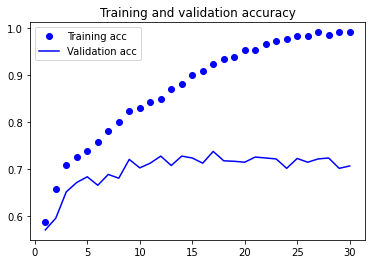

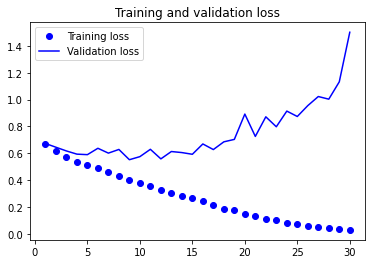

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5.2.5 데이터 증식 사용하기
- 비교적 훈련 샘플의 수가 적기 때문에 과대적합이 가장 중요한 문제
- 드롭아웃, 가중치 감소(L2 규제) 외 새로운 방법인 **데이터 증식** 시도
- 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법
- 이미지에 랜덤한 변환을 적용하여 훈련할 때 같은 데이터를 두 번 만나지 않도록 하는 것이 목표

### ImageDataGenerator를 사용하여 데이터 증식 설정하기
- `rotation_range` : 랜덤하게 사진을 회전시킬 각도 범위 (0~180 사이, ±rotation_range)
- `width_shift_range`, `height_shift_range` : 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높이에 대한 비율, 1보다 큰 값이면 픽셀 값)
- `shear_range` : 랜덤하게 전단 변환(shearing transformation)을 적용할 각도 범위(`rotation_range`로 회전할 때 y축 방향으로 각도를 증가시켜 이미지를 변형)
- `zoom_range` : 랜덤하게 사진을 확대할 범위(1±`zoom_range` 사이로 확대/축소, [최소, 최대]처럼 확대 비율의 범위를 리스트로 전달 가능)
- `horizontal_flip` : 랜덤하게 이미지를 수평으로 뒤집음 (수평 대칭을 가정할 수 있을 때, 풍경이나 인물 사진 등)
- `vertical_flip` : 랜덤하게 이미지를 수직으로 뒤집음 (수직 대칭을 가정할 수 있을 때)
- `fill_mode` : 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략
    - `nearest` : 인접한 픽셀 사용
    - `constant` : `cval` 매개변수의 값을 사용
    - `reflect`, `wrap` 등도 있음
    - [텐서플로 문서](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) 참고

In [16]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

### 랜덤하게 증식된 훈련 이미지 그리기

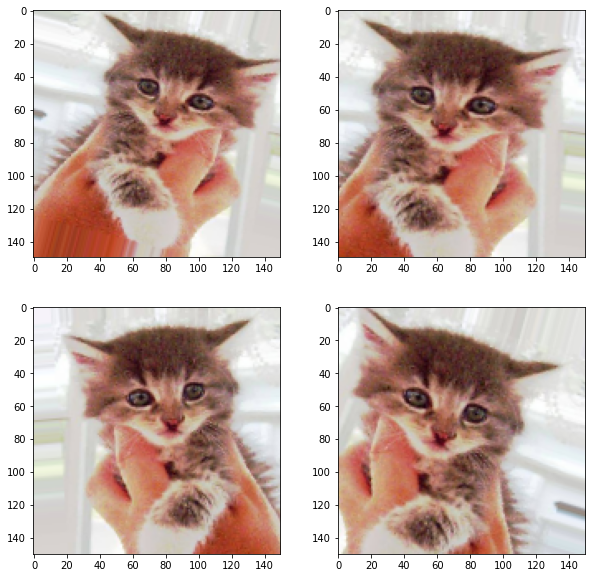

In [19]:
from tensorflow.keras.preprocessing import image # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150, 150)) # 이미지를 읽고 크기 변경

x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환

i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### 드롭아웃을 포함한 새로운 컨브넷 정의하기
- 적은 수의 원본 이미지에서 만들어졌기 때문에 입력 데이터들 사이에 상호 연관성이 큼
    - 새로운 정보가 아닌 기존 정보의 재조합만 가능하므로 과대적합을 제거하기에 충분하지 않음
- 완전 연결 분류기 직전에 `Dropout` 층을 추가
    - 합성곱에서 추출한 특성 맵을 사용하여 클래스를 분류한다는 의미의 완전 연결 층

In [24]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

### 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되어선 안 됨

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 11s 100ms/step - loss: 0.6947 - acc: 0.5080 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6845 - acc: 0.5550 - val_loss: 0.7099 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6725 - acc: 0.5855 - val_loss: 0.6714 - val_acc: 0.5800
Epoch 4/100
100/100 [==============================] - 10s 100ms/step - loss: 0.6652 - acc: 0.5890 - val_loss: 0.6460 - val_acc: 0.6190
Epoch 5/100
100/100 [==============================] - 10s 100ms/step - loss: 0.6578 - acc: 0.6030 - val_loss: 0.6516 - val_acc: 0.6200
Epoch 6/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6328 - acc: 0.6405 - val_loss: 0.6870 - val_acc: 0.5940
Epoch 7/100
100/100 [==============================] - 10s 100ms/step - loss: 0.6309 - acc: 0.6475 - va

100/100 [==============================] - 10s 99ms/step - loss: 0.4433 - acc: 0.7935 - val_loss: 0.6433 - val_acc: 0.7110
Epoch 61/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4608 - acc: 0.7875 - val_loss: 0.5526 - val_acc: 0.7280
Epoch 62/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4351 - acc: 0.8130 - val_loss: 0.4444 - val_acc: 0.7940
Epoch 63/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4405 - acc: 0.8005 - val_loss: 0.4317 - val_acc: 0.8030
Epoch 64/100
100/100 [==============================] - 10s 100ms/step - loss: 0.4514 - acc: 0.7845 - val_loss: 0.4848 - val_acc: 0.7840
Epoch 65/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4320 - acc: 0.7905 - val_loss: 0.4605 - val_acc: 0.8140
Epoch 66/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4308 - acc: 0.7940 - val_loss: 0.4943 - val_acc: 0.7850
Epoch 67/100
100/100 [==============================] - 10s 

In [26]:
model.save('../models/cats_and_dogs_small_2.h5')

### 데이터 증식을 사용했을 때 훈련 정확도와 검증 정확도
- 과대적합 되지 않음
- 규제하지 않았을 때 검증 데이터 정확도 최대 72%와 비교하여 최대 83%로 11% 향상
- 다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면 86~87% 정도까지 정확도를 얻을 수 있음
- 그러나 데이터가 적기 때문에 컨브넷을 처음부터 훈련하여 더 높은 정확도를 달성하기 어려움

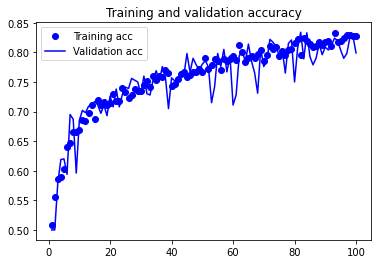

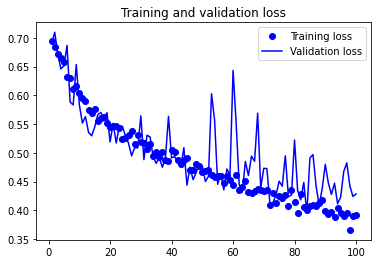

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()